In [12]:
import numpy as np
import pandas as pd
import subprocess as sub
import matplotlib.pyplot as plt
import time

## step 1. Generate sample set by metropolis method

In [14]:
start = time.time()
sub.run(['g++', 'step1_plaquette_eff.cpp', '-o', 'step1_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib', '-ltrng4', '-std=gnu++11'])
sub.run(['./step1_e'])
print("step1 finished :", time.time()-start)

#Data of Energy&nn in fileout.txt
f = pd.read_csv('fileout_eff.txt', sep = ' ', header = 0)
temp = f.temp[0]
J0 = np.array(f.ene)
J1 = np.array(f.nn)
J2 = np.array(f.nnn)
J3 = np.array(f.nnnn)
num = len(J0)
nth = int(f.nth[0]) #How much consideration of nearest neighbors
Jmat = np.array([J1, J2, J3]).T
target_mat = np.hstack([np.ones((num, 1)), Jmat[:, 0:nth]])
Jlist, err, _, _ = np.linalg.lstsq(target_mat, J0, rcond = None)
print("T =", temp, " Energy, J =", Jlist, " error =", err)

#Data of coefficient in filein.txt
with open("filein_eff.txt", "w") as file:
    file.write('%d\n' %nth)
    file.write('%.10g\n' %temp)
    for i in range (nth + 1):
        data = Jlist[i]
        file.write('%.10g\n' % data)

step1 finished : 414.45122838020325
T = 4.493  Energy, J = [ 1.33776995e+00  1.09580633e+00 -2.17415586e-02  6.20450152e-04]  error = [30381.86460981]


## step 2. optimize J, regenerate sample set by wolff method

In [15]:
sub.run(['g++', 'step2_wolff_eff.cpp', '-o', 'step2_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib','-ltrng4', '-std=gnu++11'])
for i in range (15):
    start = time.time()
    sub.run(['./step2_e'])
    print("step2 :", time.time()-start)

    #Data of Energy&nn in fileout.txt
    f = pd.read_csv('fileout_eff.txt', sep = ' ', header = 0)
    temp = f.temp[0]
    J0 = np.array(f.ene)
    J1 = np.array(f.nn)
    J2 = np.array(f.nnn)
    J3 = np.array(f.nnnn)
    num = len(J0)
    nth = int(f.nth[0]) #How much consideration of nearest neighbors
    Jmat = np.array([J1, J2, J3]).T
    target_mat = np.hstack([np.ones((num, 1)), Jmat[:, 0:nth]])
    Jlist, err, _, _ = np.linalg.lstsq(target_mat, J0, rcond = None)
    print("T =", temp, " Energy, J =", Jlist, " error =", err)
    #Data of coefficient in filein.txt
    with open("filein_eff.txt", "w") as file:
        file.write('%d\n' %nth)
        if temp>2.5: file.write('%.10g\n' %temp)
        else: file.write('%.10g\n' %(temp+0.2))
        for i in range (nth + 1):
            data = Jlist[i]
            file.write('%.10g\n' % data)

step2 : 349.58586978912354
T = 4.293  Energy, J = [ 1.67933691e+00  1.10382144e+00 -2.48783082e-02 -1.01602679e-05]  error = [31096.65417471]
step2 : 311.94814109802246
T = 4.093  Energy, J = [ 1.99152021e+00  1.11257473e+00 -2.89685742e-02 -1.73142105e-03]  error = [28929.18313913]
step2 : 260.29739904403687
T = 3.8930000000000002  Energy, J = [ 2.16777231e+00  1.11483007e+00 -2.85133343e-02  8.11233875e-04]  error = [28236.12058153]
step2 : 214.80267310142517
T = 3.693  Energy, J = [ 2.70990878e+00  1.12756796e+00 -3.51936233e-02  2.59002255e-04]  error = [26417.22698527]
step2 : 177.09659552574158
T = 3.4930000000000003  Energy, J = [ 3.10876590e+00  1.13504550e+00 -3.68145379e-02 -1.91319529e-03]  error = [24378.50812212]
step2 : 130.80757474899292
T = 3.293  Energy, J = [ 3.57276854e+00  1.14506259e+00 -4.42494230e-02  3.97954039e-04]  error = [22648.39634036]
step2 : 77.2822892665863
T = 3.093  Energy, J = [ 4.32129422e+00  1.15932343e+00 -5.16170386e-02  1.61398762e-04]  error =

## step 3. Compare magnetization

In [16]:
start = time.time()
sub.run(['g++', 'step3_plot_eff.cpp', '-o', 'step3_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib', '-ltrng4', '-std=gnu++11'])
sub.run(['./step3_e'])
print("step3 :", time.time()-start)

step3 : 24741.20774435997


Plaquette & Fitted of L=10


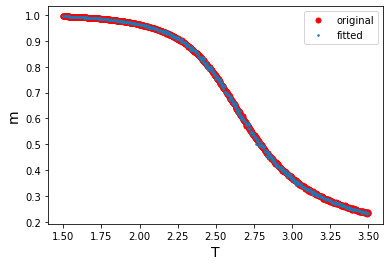

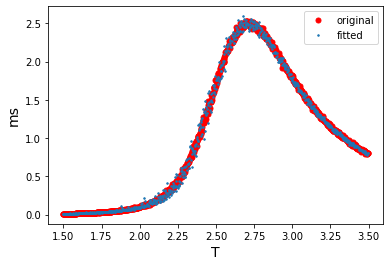

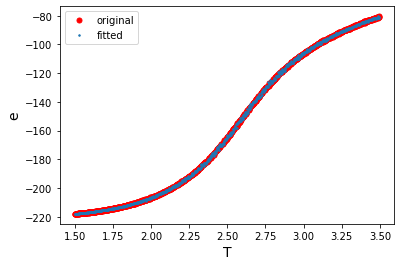

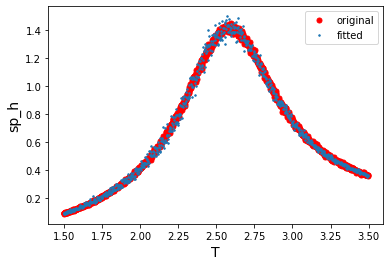

In [22]:
cols = ['m', 'ms', 'e', 'sp_h']
p = pd.read_csv('../../python/txtfiles-5/p10.txt', sep=' ', header=0)
fit = pd.read_csv('plot_eff.txt', sep = ' ', header = 1)

print("Plaquette & Fitted of L=10")

for j in range (4):
    plt.plot(p.temperature, p[cols[j]], 'r.', markersize = 10, markerfacecolor = None, linestyle = 'None', label = 'original')
    plt.plot(fit.temperature[fit.temperature>=1.5], fit[cols[j]][fit.temperature>=1.5], '.', markersize = 3, label = 'fitted')
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.legend()
    plt.show()